In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./dataset/movie_metadata.csv')

In [15]:
df.shape

(5043, 28)

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [13]:
df.imdb_score.isnull().sum()

0

In [16]:
df.budget.isnull().sum()

492

In [18]:
df[df.budget.isnull()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
55,Color,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,...,345.0,English,USA,PG,NaN,2015.0,150.0,6.8,2.35,20000
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
98,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
199,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000.0,NaN,Action|Fantasy,...,2.0,English,UK,NaN,NaN,2011.0,570.0,7.5,NaN,40
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
206,Color,Matt Birch,4.0,NaN,0.0,1000.0,Toby Jones,10000.0,NaN,Fantasy,...,2.0,English,UK,NaN,NaN,2010.0,2000.0,6.4,NaN,25
260,Color,NaN,29.0,60.0,NaN,432.0,Dirk Benedict,669.0,NaN,Action|Adventure|Crime,...,97.0,English,USA,TV-PG,NaN,NaN,554.0,7.6,4.00,0
279,NaN,Christopher Barnard,NaN,22.0,0.0,NaN,NaN,5.0,NaN,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,0
367,Color,Timur Bekmambetov,1.0,141.0,335.0,635.0,Ayelet Zurer,11000.0,NaN,Adventure|Drama|History,...,1.0,English,USA,PG-13,NaN,2016.0,745.0,6.1,2.35,0


In [29]:
df_budget = df[df.budget.notna()]

In [30]:
df_budget.budget.describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [33]:
df_budget.budget.dtypes

dtype('float64')

In [37]:
df_budget.budget.min()

218.0

In [43]:
df_budget['budgetmil'] = df_budget.budget/1000

C:\Users\Dicsys\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_budget.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budgetmil
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,300000.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,245000.0


In [47]:
df_budget.budgetmil.describe()

count    4.551000e+03
mean     3.975262e+04
std      2.061149e+05
min      2.180000e-01
25%      6.000000e+03
50%      2.000000e+04
75%      4.500000e+04
max      1.221550e+07
Name: budget, dtype: float64

In [50]:
df_budget.budgetmil.quantile(0.25)

6000.0

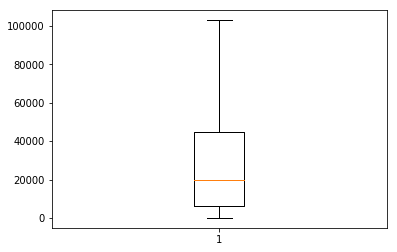

In [59]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df_budget.budgetmil,showfliers=False);

In [60]:
df_budget_minimos = df_budget[(df_budget.budgetmil <= 2000) & (df_budget.budgetmil > 600)]

In [61]:
df_budget_minimos.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budgetmil
177,Color,NaN,21.0,60.0,NaN,184.0,Philip Michael Thomas,982.0,NaN,Action|Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,1500000.0,NaN,321.0,7.5,1.33,0,1500.0
857,Color,NaN,77.0,44.0,NaN,72.0,Don S. Davis,847.0,NaN,Action|Adventure|Drama|Sci-Fi,...,English,USA,TV-14,1400000.0,NaN,440.0,8.4,1.33,0,1400.0
890,Black and White,Stanley Kubrick,103.0,152.0,0.0,177.0,Shelley Winters,617.0,NaN,Crime|Drama|Romance,...,English,UK,Not Rated,2000000.0,1962.0,367.0,7.7,1.66,0,2000.0
1044,Color,Chuck Bowman,32.0,89.0,42.0,235.0,Lochlyn Munro,598.0,NaN,Horror|Thriller,...,English,USA,NaN,1500000.0,2006.0,555.0,4.6,1.78,352,1500.0
1061,Black and White,Andrei Tarkovsky,144.0,115.0,0.0,12.0,Anatoliy Solonitsyn,29.0,NaN,Drama|Mystery|Sci-Fi,...,Russian,Soviet Union,PG,1000000.0,1972.0,29.0,8.1,2.35,0,1000.0


In [80]:
df_rank_min_bud = df_budget_minimos.sort_values(by='imdb_score',ascending=False).head(10)

In [81]:
df_rank_min_bud[['movie_title','imdb_score','budget']]

,movie_title,imdb_score,budget
4498,"The Good, the Bad and the Ugly",8.9,1200000.0
4747,Seven Samurai,8.7,2000000.0
4468,Queen of the Mountains,8.7,1400000.0
4526,Casablanca,8.6,950000.0
4427,Modern Times,8.6,1500000.0
2242,Psycho,8.5,806947.0
4259,The Lives of Others,8.5,2000000.0
4359,Dr. Strangelove or: How I Learned to Stop Worr...,8.5,1800000.0
4253,To Kill a Mockingbird,8.4,2000000.0
857,Stargate SG-1,8.4,1400000.0


In [82]:
df_rank_min_bud.imdb_score = df_rank_min_bud.imdb_score.apply(np.int64)

In [85]:
pd.options.display.float_format = '${:,.2f}'.format
df_rank_min_bud[['movie_title','imdb_score','budget']]

,movie_title,imdb_score,budget
4498,"The Good, the Bad and the Ugly",8,"$1,200,000.00"
4747,Seven Samurai,8,"$2,000,000.00"
4468,Queen of the Mountains,8,"$1,400,000.00"
4526,Casablanca,8,"$950,000.00"
4427,Modern Times,8,"$1,500,000.00"
2242,Psycho,8,"$806,947.00"
4259,The Lives of Others,8,"$2,000,000.00"
4359,Dr. Strangelove or: How I Learned to Stop Worr...,8,"$1,800,000.00"
4253,To Kill a Mockingbird,8,"$2,000,000.00"
857,Stargate SG-1,8,"$1,400,000.00"
